In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
sns.set()

In [2]:
# 데이터 로드
with open('./pkl/factor.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
# 시장국면 데이터
regime = df.iloc[:, :5]

regime

,Growth,Inflation,Volatilities,Funding Liquidity,Market Liquidity
Date,,,,,
1984-12-31,100.1250,7.910,0.124267,0.64100,-0.036026
1985-01-31,100.1595,7.902,0.120588,0.44200,-0.008413
1985-02-28,100.1727,7.829,0.099169,0.65100,-0.010403
1985-03-31,100.1734,7.998,0.093987,0.67400,0.005934
1985-04-30,100.1587,7.958,0.076866,0.57200,0.010068
...,...,...,...,...,...
2021-08-31,100.8857,4.348,0.081925,0.08413,0.012418
2021-09-30,100.8140,4.592,0.130115,0.09713,-0.016866
2021-10-31,100.7223,5.231,0.106962,0.08405,-0.006214


In [4]:
# 팩터 데이터
factor = df.iloc[:, 5:]
factor

,Equity Beta,Bond Beta,Currency Beta,Commodity Beta,Equity Momentum,Bond Momentum,Currency Momentum,Commodity Momentum,Equity Value,Bond Value,Currency Value,Commodity Value,Equity Carry,Bond Carry,Currency Carry,Commodity Carry
Date,,,,,,,,,,,,,,,,
1984-12-31,0.0144,0.0079,-0.015146,-0.0395,0.0097,0.0267,0.0090,0.0911,-0.0021,-0.0128,0.0030,-0.0595,-0.0057,0.0189,0.0075,0.0686
1985-01-31,0.0692,0.0172,-0.008252,0.0166,0.0158,0.0309,0.0075,0.0253,0.0452,-0.0253,0.0043,0.0230,-0.0193,-0.0089,0.0073,0.0429
1985-02-28,0.0146,-0.0147,-0.050354,-0.0323,0.0140,-0.0055,-0.0061,0.0662,-0.0200,-0.0067,0.0015,-0.0555,0.0213,0.0077,-0.0099,0.0621
1985-03-31,0.0017,0.0025,0.070008,0.0571,0.0029,-0.0141,-0.0259,-0.0180,0.0035,0.0147,0.0348,0.0670,0.0027,0.0083,-0.0003,0.0131
1985-04-30,0.0305,0.0066,-0.003486,-0.0351,0.0374,-0.0270,-0.0011,0.0747,0.0098,0.0361,0.0117,-0.0622,-0.0073,0.0177,-0.0092,0.0670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.0256,-0.0020,-0.004904,0.0002,0.0043,-0.0009,0.0050,-0.0444,-0.0125,0.0055,-0.0048,0.0459,-0.0181,0.0018,0.0091,-0.0488
2021-09-30,-0.0150,-0.0179,-0.017317,0.0209,-0.0018,0.0065,0.0056,0.0666,0.0193,0.0010,-0.0018,-0.0356,-0.0052,-0.0085,0.0060,0.0777
2021-10-31,0.0304,-0.0121,0.001136,0.0406,0.0146,-0.0030,0.0271,0.0034,-0.0346,-0.0180,-0.0325,-0.0310,-0.0081,-0.0163,0.0228,0.0561


In [5]:
# 시장국면 데이터 표준화
scaler = StandardScaler()
rescaled_regime = scaler.fit_transform(regime)
rescaled_regime_df = pd.DataFrame(rescaled_regime, index=regime.index, columns=regime.columns)

<Axes: xlabel='Date'>

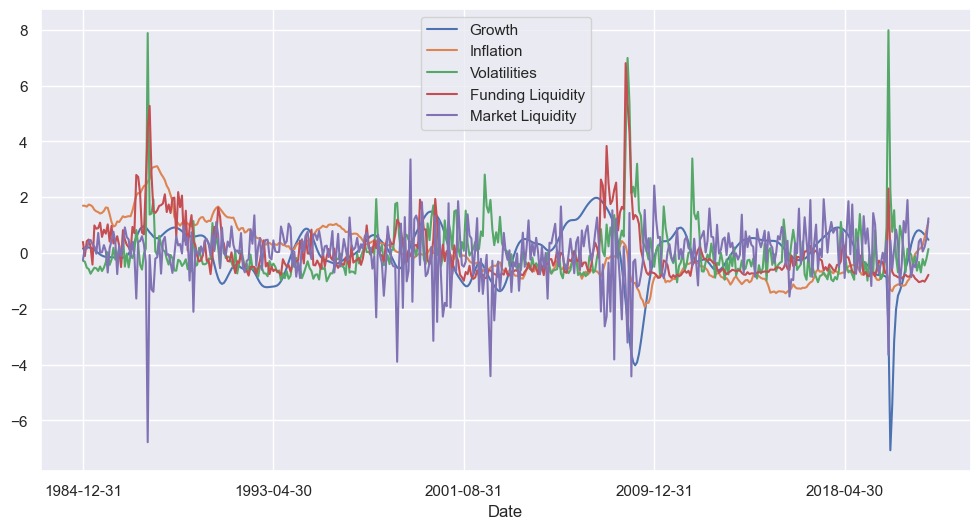

In [6]:
# 표준화 결과 시각화
rescaled_regime_df.plot(figsize=(12, 6))

In [7]:
# 국면 분석 기준 설정
# 하단 기준선
low_threshold = rescaled_regime_df.quantile(1/3)

# 상단 기준선
high_threshold = rescaled_regime_df.quantile(2/3)

In [8]:
# 낮은 국면
low_regime = (rescaled_regime_df < low_threshold) * 1

# 높은 국면
high_regime = (rescaled_regime_df > high_threshold) * 1

# 중간 국면
middle_regime = ((rescaled_regime_df >= low_threshold) & (rescaled_regime_df <= high_threshold)) * 1

In [9]:
low_regime

,Growth,Inflation,Volatilities,Funding Liquidity,Market Liquidity
Date,,,,,
1984-12-31,0,0,0,0,1
1985-01-31,0,0,0,0,0
1985-02-28,0,0,1,0,0
1985-03-31,0,0,1,0,0
1985-04-30,0,0,1,0,0
...,...,...,...,...,...
2021-08-31,0,0,1,1,0
2021-09-30,0,0,0,1,0
2021-10-31,0,0,0,1,0


<Axes: xlabel='Date'>

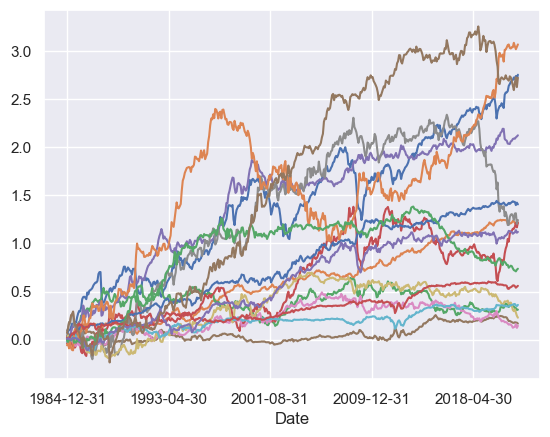

In [10]:
factor.cumsum().plot(legend=False)

In [11]:
# 빈 딕셔너리 생성
low_regime_dict = {}
middle_regime_dict = {}
high_regime_dict = {}

# 국면별 팩터 평균수익률 저장
for rgm in regime.columns:
    low_regime_dict[rgm] = (factor.multiply(low_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(low_regime[rgm], axis=0)))) * 252
    middle_regime_dict[rgm] = (factor.multiply(middle_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(low_regime[rgm], axis=0)))) * 252
    high_regime_dict[rgm] = (factor.multiply(high_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(high_regime[rgm], axis=0)))) * 252

In [12]:
# 낮은 국면 데이터프레임
low_regime_df = pd.DataFrame(low_regime_dict)

# 중간 국면 데이터프레임
middle_regime_df = pd.DataFrame(middle_regime_dict)

# 높은 국면 데이터프레임
high_regime_df = pd.DataFrame(high_regime_dict)

In [13]:
# 전체 국면 분석 종합 딕셔너리
total_regime_dict = {}

for rgm in regime.columns:
    temp_df = pd.concat([low_regime_df[rgm], middle_regime_df[rgm], high_regime_df[rgm]], axis=1, join='inner')
    temp_df.columns = ['low', 'middle', 'high']
    total_regime_dict[rgm] = temp_df

<Axes: >

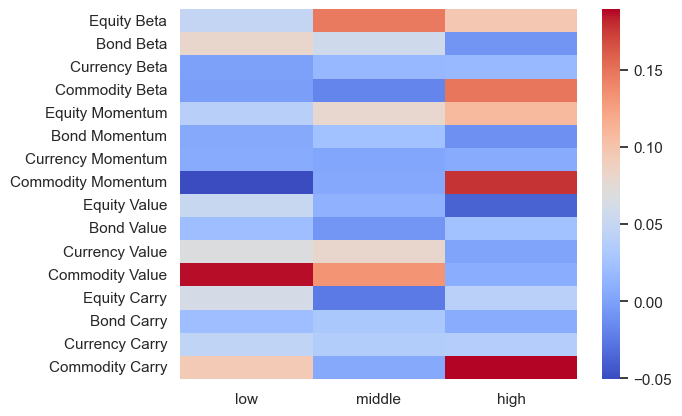

In [14]:
# 경제성장
sns.heatmap(total_regime_dict['Growth'], cmap='coolwarm')

<Axes: >

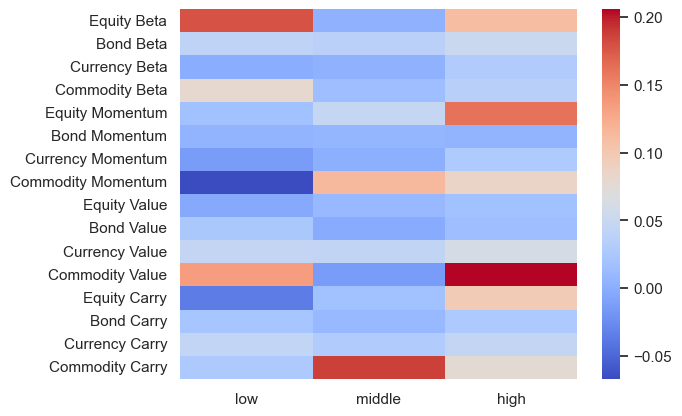

In [15]:
# 물가
sns.heatmap(total_regime_dict['Inflation'], cmap='coolwarm')

<Axes: >

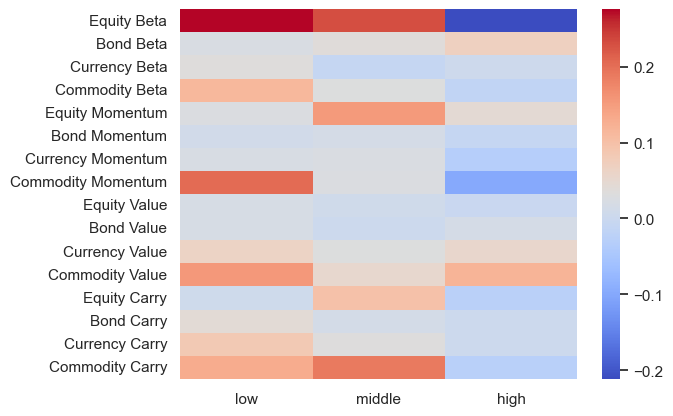

In [16]:
# 변동성
sns.heatmap(total_regime_dict['Volatilities'], cmap='coolwarm')

<Axes: >

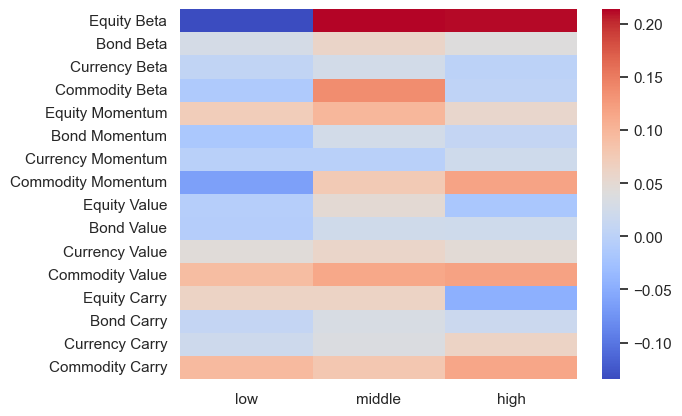

In [17]:
# 시장 유동성
sns.heatmap(total_regime_dict['Market Liquidity'], cmap='coolwarm')

<Axes: >

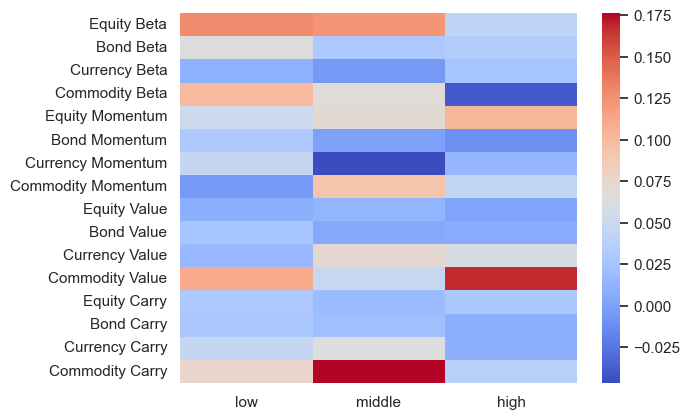

In [18]:
# 자금 유동성
sns.heatmap(total_regime_dict['Funding Liquidity'], cmap='coolwarm')